<a href="https://www.kaggle.com/code/scottxchoo/cactus-2-baseline-model?scriptVersionId=145052116" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Baseline Model

Let's use Python to create a deep learning model using a simple CNN model as a baseline. The steps for deep learning modeling with Python are as follows.

파이토치를 활용해 딥러닝 모델을 만들어보겠습니다. 베이스라인은 간단한 CNN 모델을 활용하겠습니다. 파이토치를 활용한 딥러닝 모델링 절차는 다음과 같습니다.

1. Fix the seed value and set up the GPU equipment (시드값 고정 및 GPU 장비 설정)
   - [1] Fix the seed value (시드값 고정)
   - [2] Set up GPU equipment : Changing the data to be processed by GPU to speed up training

2. Prepare Data (데이터 준비)
   - [1] Separate training/validation data (훈련/검증 데이터 분리)
   - [2] Define dataset classes (데이터셋 클래스 정의) : to ensure that image data is imported in a form suitable for modeling
   - [3] Create datasets (데이터셋 생성)
   - [4] Create a data loader (데이터 로더 생성)


3. Create Model (모델 생성) : Design your own neural network model class and create an instance

4. Train Model (모델 훈련)
   - [1] Set Loss Function
   - [2] Set Optimizer
   - [3] Train Model : Train the model by updating the weights (parameters) of the neural network.

5. Validate Performance (성능 검증) : Verify model performance with validation data

6. Predict & Submit (예측 및 제출) : Predict with test data and submit results

## 1. Fix the seed value and set up your GPU equipment (시드값 고정 및 GPU 장비 설정)

This is not a step in the machine learning competition, but rather a step that was added due to the nature of deep learning and Python.

머신러닝 경진대회에서는 없던 단계이며 딥러닝과 파이토치의 특성 때문에 추가된 단계라고 보시면 됩니다.

### [1] Fix the seed value (시드값 고정)

We're going to import Python and fix the seed value. The reason for fixing the seed value is so that we can run it again and get the same result. When I do deep learning modeling with Pytoch, I do this at the beginning (not when training the model).

파이토치를 임포트하고 시드값을 고정하겠습니다. 시드값을 고정하는 이유는 다시 실행해도 같은 결과를 얻기 위해서입니다. 파이토치로 딥러닝 모델링을 할 때는 (모델 훈련 시가 아니라) 이렇게 맨 처음에 고정합니다.

In [ ]:
import torch # 파이토치
import random
import numpy as np
import os

# 시드값 고정
seed = 50
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)                # 파이썬 난수 생성기 시드 고정
np.random.seed(seed)             # 넘파이 난수 생성기 시드 고정
torch.manual_seed(seed)          # 파이토치 난수 생성기 시드 고정 (CPU 사용 시)
torch.cuda.manual_seed(seed)     # 파이토치 난수 생성기 시드 고정 (GPU 사용 시)
torch.cuda.manual_seed_all(seed) # 파이토치 난수 생성기 시드 고정 (멀티GPU 사용 시)
torch.backends.cudnn.deterministic = True # 확정적 연산 사용
torch.backends.cudnn.benchmark = False    # 벤치마크 기능 해제
torch.backends.cudnn.enabled = False      # cudnn 사용 해제

Not all of this seed value fixing code is necessary for using Python on a GPU in a kaggle, but we've tried to fix as many seed values as possible for those who may be working in a different environment.

Please note that even with fixed seed values, Pytorch can still produce different results depending on different hash values, so there is no guarantee that your results will be exactly the same even with fixed seed values.

Conversely, if you don't need to reproduce your results, you may want to skip the seed value. This is because fixing a seed value when using Python can lead to slower speeds and poorer prediction performance.

이 모든 시드값 고정 코드가 캐글에서 GPU로 파이토치 사용 시 반드시 필요한 건 아닙니다. 그러나 다른 환경에서 작업할 수도 있는 분들을 위해 최대한 많은 시드값을 고정해봤습니다.

한편, 파이토치는 시드값을 고정하더라도 해시값들에 따라서 결과가 달라질 수 있습니다. 즉, 시드값을 고정하더라도 결과가 완벽히 같다는 보장이 없습니다.

반대로 결과를 재현할 필요가 없다면 시드값 고정은 생략하는 게 나을 수 있습니다. 파이토치를 사용할 때 시드값을 고정하면 속도도 느려지고 예측 성능도 떨어질 우려가 있기 때문입니다.

### [2] Set up GPU equipment (GPU 장비 설정)

Next, you need to set up your device. Unlike machine learning competitions that deal with structured data (CSV files, etc.), deep learning competitions primarily deal with unstructured data (images, voice, text, etc.). Modeling unstructured data is computationally intensive. It's too much for a CPU to handle, and the training time becomes too long. That's where GPUs come in. GPUs can process hundreds to tens of thousands of simple operations in parallel, making it possible to train deep learning models much faster than CPUs.

이어서 장비(device)를 설정해야 합니다. 정형 데이터(csv 파일 등)를 다루는 머신러닝 경진대회와 달리 딥러닝 경진대회는 주로 비정형 데이터(이미지, 음성, 텍스트 등)를 다룹니다. 비정형 데이터를 모델링하려면 연산량이 많아집니다. CPU로는 감당하기 벅찰 정도라서 훈련 시간이 너무 길어집니다. 그래서 GPU를 사용해야 하죠. GPU는 단순 연산 수백~수만 개 이상을 병렬로 처리할 수 있어서 딥러닝 모델을 CPU보다 훨씬 빠르게 훈련시켜줍니다.

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

CUDA (compute unified device architecture) is a parallel processing platform developed by NVIDIA. If CUDA can use a GPU, we're going to set the device to 'cuda', otherwise we're going to set it to 'cpu'.

And if you look at the [Settings] tab on the right, you'll see that Accelerator is set to None, so change that to GPU, and then run the code below to make sure it's done and you get `type='cuda`.

CUDA(compute unified device architecture)는 엔비디아에서 개발한 병렬 처리 플랫폼입니다. 만일 CUDA에서 GPU를 사용할 수 있다면 장비를 'cuda'로, 그렇지 않으면 'cpu'로 설정하도록 했습니다.

그리고 오른쪽 [Settings] 탭을 보면 Accelerator가 None으로 되어 있을 텐데, 이를 GPU로 바꿔줍니다. 그리고 잘 바뀌었는지 아래 코드를 실행해서 `type='cuda`가 나오는지 확인합니다.

In [ ]:
device

## 2. Prepare Data (데이터 준비)

Now, you will go through the following steps

이제는 아래와 같은 과정을 거치게 됩니다.

1. Separate training/validation data (훈련/검증 데이터 분리)
2. Define dataset classes (데이터셋 클래스 정의)
3. Create datasets (데이터셋 생성)
4. Create a data loader (데이터 로더 생성)

The data loader is responsible for feeding the data needed to train the deep learning model in minibatches. The transformer defined in the dataset class converts the original data into various forms.

Now let's prepare the data for modeling.

데이터 로더는 딥러닝 모델의 훈련에 필요한 데이터를 미니배치 단위로 공급하는 역할을 합니다. 이때 데이터셋 클래스에 정의된 변환기가 원본 데이터를 다양한 형태로 변환해줍니다.

이제 모델링을 위한 데이터를 준비하겠습니다.

In [ ]:
import pandas as pd

data_path = '/kaggle/input/aerial-cactus-identification/'

labels = pd.read_csv(data_path + 'train.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [ ]:
from zipfile import ZipFile

# 훈련 이미지 데이터 압축 풀기
with ZipFile(data_path + 'train.zip') as zipper:
    zipper.extractall()
    
# 테스트 이미지 데이터 압축 풀기
with ZipFile(data_path + 'test.zip') as zipper:
    zipper.extractall()

### [1] Separate training/validation data (훈련/검증 데이터 분리)

Currently, labes contains the contents of a train.csv file provided by the competition organizers. We want to split this data into training and validation data using the train_test_split() function.

현재 labes에는 대회 주최 측에서 제공한 train.csv 파일의 내용이 담겨 있습니다. train_test_split() 함수를 사용해 이 데이터를 훈련 데이터와 검증 데이터로 나눠보려고 합니다.

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
train, valid = train_test_split(labels,
                                test_size = 0.1, # (1)
                                stratify = labels['has_cactus'], # (2)
                                random_state = 50)

(1) test_size is the ratio of validation data. Since we passed 0.1, the ratio of training data to validation data would be 9:1.

(2) As we saw earlier, the ratio of target values is 3:1, so if we pass the column names of the target values to the stratify parameter, the ratio of target values in the training and validation data will also be about 3:1.

(1) test_size가 검증 데이터의 비율을 뜻합니다. 0.1을 전달했으니 훈련 데이터와 검증 데이터 비율이 9:1이 되었겠죠.

(2) 앞서 본 바와 같이 타깃값 비율이 3:1입니다. 따라서 stratify 파라미터에 타깃값의 열 이름을 전달하면 훈련 데이터와 검증 데이터 내 타깃값 비율도 약 3:1이 됩니다.

In [ ]:
print('훈련 데이터 개수:', len(train))
print('검증 데이터 개수:', len(valid))

The ratio of training data to validation data is exactly 9:1.

훈련 데이터와 검증 데이터 비율이 정확히 9:1입니다.

### [2] Define dataset classes (데이터셋 클래스 정의)

We're going to create a custom dataset. To build a neural network model with Python, we need to define our dataset in a certain format.

이번에는 사용자 정의 데이터셋을 만들겠습니다. 파이토치로 신경망 모델을 구축하려면 데이터셋도 일정한 형식에 맞게 정의해줘야 합니다.

In [ ]:
import cv2 # OpenCV 라이브러리
from torch.utils.data import Dataset # 데이터 생성을 위한 클래스

We can utilize the Dataset class provided by Pytoch to create a dataset object. Dataset is an abstract class, and we need to inherit from it and then override its special methods, __len__() and __getitem__().

- __len__() : Returns the size of the Dataset
- __getitem__() : Given an index, returns the data corresponding to the index

파이토치에서 제공하는 Dataset 클래스를 활용해 데이터셋 객체를 만들 수 있습니다. Dataset은 추상 클래스이며, 우리는 Dataset을 상속받은 다음 특수 메서드인 __len__()과 __getitem__()을 재정의(오버라이딩)해야 합니다.

- __len__() : 데이터셋 크기 반환
- __getitem__() : 인덱스를 전달받아 인덱스에 해당하는 데이터 반환

In [ ]:
class ImageDataset(Dataset):
    # (1) 초기화 메서드(생성자)
    def __init__(self, df, img_dir = './', transform = None):
        super().__init__() ## (2) 상속받은 Dataset의 생성자 호출
        # (3) 전달받은 인수들 저장
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
    
    # (4) 데이터셋 크기 반환 메서드
    def __len__(self):
        return len(self.df)
    
    # (5) 인덱스(idx)에 해당하는 데이터 반환 메서드
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx, 0]                  # 이미지 ID
        img_path = self.img_dir + img_id               # (6) 이미지 파일 경로
        image = cv2.imread(img_path)                   # 이미지 파일 읽기 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
        label = self.df.iloc[idx, 1]                   # 이미지 레이블(타깃값)
        
        if self.transform is not None:
            image = self.transform(image) # (7) 변환기가 있다면 이미지 변환
        return image, label # (8)

1. __init__() is the initialization method of the ImageDataset class.
2. call the initialization method of the inherited Dataset.
3. save the arguments received as parameters.
   - df : DataFrame object. We will pass train or valid to the df parameter.
   - img_dir: Path containing image data
   - transform: an image transformer. You can do some basic preprocessing when creating an image dataset, and if you want to do that, you can pass in an image transformer.
4. __len__() is a method that returns the size of the dataset. It overrides a method already defined in the Dataset class.
5. __getitem__() is a method that returns the data corresponding to the specified index.
6. the path received from the initialization method is combined with the image ID to find the image location.
7. similarly, if we received an image transform from the initialization method, we perform the transformation and return it.
8. return the idxth image and its label (target value).

With that, we've defined the ImageDataset class that will create our dataset.

1. __init__()는 ImageDataset 클래스의 초기화 메서드입니다.
2. 상속받은 Dataset의 초기화 메서드를 호출한 후
3. 파라미터로 받은 인수들을 저장합니다.
   - df : DataFrame 객체. 앞에서 나눈 train 혹은 valid를 df 파라미터에 전달할 겁니다.
   - img_dir : 이미지 데이터를 포함하는 경로
   - transform : 이미지 변환기. 이미지 데이터셋을 만들 때 기본적인 전처리를 할 수 있는데, 전처리를 하려면 이미지 변환기를 넘겨주면 됩니다.
4. __len__()은 데이터셋의 크기를 반환하는 메서드입니다. Dataset 클래스에 이미 정의되어 있는 메서드를 재정의하는 겁니다.
5. __getitem__()은 지정한 인덱스에 해당하는 데이터를 반환하는 메서드입니다.
6. 초기화 메서드에서 받은 경로에 이미지 ID를 합쳐 이미지 위치를 알아내고
7. 마찬가지로 초기화 메서드에서 이미지 변환기(transform)를 받아뒀다면 변환 작업까지 수행한 후 반환합니다.
8. idx째 이미지와 레이블(타깃값)을 반환합니다.

이상으로 데이터셋을 생성해줄 ImageDataset 클래스를 정의했습니다.

### [3] Create datasets (데이터셋 생성)

Let's create a dataset using the ImageDataset class we defined earlier. To handle images with the Pytoch model, we need to turn image data into a tensor type.

앞서 정의한 ImageDataset 클래스를 이용해서 데이터셋을 만들어보겠습니다. 파이토치 모델로 이미지를 다루려면 이미지 데이터를 텐서(tensor) 타입으로 바꿔야 합니다.

In [ ]:
from torchvision import transforms # 이미지 변환을 위한 모듈

transform = transforms.ToTensor()

torchvision is a computer vision library for Python, and transform is a module that provides various image transformers.

We turned the image into a tensor with the ToTensor() method. When processing an image with Python, the geometry must be in the order (number of channels, number of horizontal pixels, number of vertical pixels), so the geometry is changed from (number of horizontal pixels, number of vertical pixels, number of channels) to (number of channels, number of horizontal pixels, number of vertical pixels).

Usually, you'll want to combine a few transformers to apply multiple transformations. We'll see how to combine multiple transformers in "Improving model performance".

Next, let's create a training dataset and a validation dataset. We can do this using the ImageDataset() class we defined earlier.

torchvision은 파이토치용 컴퓨터 비전 라이브러리이며, transform는 다양한 이미지 변환기를 제공하는 모듈입니다.

ToTensor() 메서드로 이미지를 텐서로 바꿨습니다. 파이토치로 이미지를 처리할 때는 형상이 (채널 수, 가로 픽셀 수, 세로 픽셀 수) 순서여야 합니다. 그래서 형상이 (가로 픽셀 수, 세로 픽셀 수, 채널 수)에서 (채널 수, 가로 픽셀 수, 세로 픽셀 수)로 바뀝니다.

보통은 여러 가지 변환을 적용하기 위해 변환기 몇 개를 결합해 사용합니다. 여러 변환기를 결합하는 방법은 '모델 성능 개선'에서 진행하겠습니다.

이어서 훈련 데이터셋과 검증 데이터셋을 만들어보겠습니다. 앞에서 정의한 ImageDataset() 클래스를 사용하면 됩니다.

In [ ]:
dataset_train = ImageDataset(df = train, img_dir = 'train/', transform = transform)
dataset_valid = ImageDataset(df = valid, img_dir = 'train/', transform = transform)

For the df parameter, pass either training data (train) or validation data (valid). For img_dir, we pass the path where the image data is stored, and for transform, we pass the transform transformer we just created.

df 파라미터에는 훈련 데이터(train)나 검증 데이터(valid)를 전달합니다. img_dir에는 이미지 데이터가 저장되어 있는 경로를, transform에는 방금 만든 transform 변환기를 전달합니다.

### [4] Create a data loader (데이터 로더 생성)

After the dataset, you need to create a data loader. A data loader is an object that fetches data in batches of the size you specify. When training a deep learning model, you'll often want to import data in batches to train it. This is because it's much faster to train in batches.

데이터셋 다음으로는 데이터 로더를 생성해야 합니다. 데이터 로더는 지정한 배치 크기만큼씩 데이터를 불러오는 객체입니다. 딥러닝 모델을 훈련할 때는 주로 배치 단위로 데이터를 가져와 훈련합니다. 묶음 단위로 훈련하는 게 훨씬 빠르기 때문이죠.

In [ ]:
from torch.utils.data import DataLoader # 데이터 로더 클래스

loader_train = DataLoader(dataset = dataset_train, batch_size = 32, shuffle = True)
loader_valid = DataLoader(dataset = dataset_valid, batch_size = 32, shuffle = False)

So we've created a data loader for training and another for validation.

이렇게 훈련 시 사용할 데이터 로더와 검증 시 사용할 데이터 로더를 만들었습니다.

## 3. Create Model (모델 생성)

We'll create a basic convolutional neural network (CNN) model.

We'll take image data with the shape (3, 32, 32), convolve it twice, pool it, flatten it, fully-connected it, and finally find the probability of a value of 0 and the probability of 1.

이번에는 기본적인 합성곱 신경망(CNN) 모델을 만들어보겠습니다.

(3, 32, 32) 형상의 이미지 데이터를 두 번의 합성곱과 풀링, 평탄화, 전결합 등을 거쳐 최종적으로 값이 0일 확률과 1일 확률을 구할 것입니다.

In [ ]:
import torch.nn as nn # 신경망 모듈
import torch.nn.functional as F # 신경망 모듈에서 자주 사용되는 함수

torch.nn is the neural module provided by Pytoch, and torch.nn.functional is a collection of frequently used functions in the neural network module.

CNN models are defined by inheriting from nn.Module and overriding forward(), the method that returns the result after forward propagation. Note that in Python, nn.Module is the base class for all neural network modules.

torch.nn은 파이토치에서 제공하는 신경말 모듈이고 torch.nn.functional은 신경망 모듈에서 자주 사용하는 함수들을 모아둔 모듈입니다.

CNN 모델은 nn.Module을 상속해 정의합니다. 그리고 순전파 후 결과를 반환하는 메서드인 forward()를 재정의합니다. 참고로 파이토치에서 nn.Module은 모든 신경망 모듈의 기반 클래스입니다.

In [ ]:
class Model(nn.Module):
    # (1) 신경망 계층 정의
    def __init__(self):
        super().__init__() # 상속받은 nn.Module의 __init__() 메서드 호출
        # (2) 첫 번째 합성곱 계층
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, 
                               kernel_size = 3, padding = 2)
        # (3) 두 번째 합성곱 계층
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, 
                               kernel_size = 3, padding = 2)
        # (4) 최대 풀링 계층
        self.max_pool = nn.MaxPool2d(kernel_size = 2)
        # (5) 평균 풀링 계층
        self.avg_pool = nn.AvgPool2d(kernel_size = 2)
        # (6) 전결합 계층
        self.fc = nn.Linear(in_features = 64 * 4 * 4, out_features = 2)
    
    # (7) 순전파 출력 정의
    def forward(self, x):
        x = self.max_pool(F.relu(self.conv1(x)))
        x = self.max_pool(F.relu(self.conv2(x)))
        x = self.avg_pool(x)
        x = x.view(-1, 64 * 4 * 4) # 평탄화
        x = self.fc(x)
        return x

(1) In the initialization method, __init__(), we define the neural network layers for our model. We will combine the layers defined here in the (7) forward() method to complete the model.

The parameters of nn.Conv2d() are as follows
  - in_channels: the number of channels in the input data
  - out_channels : Number of channels in the output data
  - kernel_size: filter (kernel) size
  - stride: stride size
  - padding: padding size

If the stride parameter is not specified in 'Pooling', the stride size is set to the same as the pooling size by default.

(6) Define the fully-connected stride, which can be implemented with nn.Linear(), passing the number of input values in the in_features parameter and the number of final output values in the out_features parameter.

But why are there `64 * 4 * 4` inputs? The number of inputs can be calculated by the following formula.

(1) 초기화 메서드인 __init__()에서 우리 모델에서 쓸 신경망 계층들을 정의합니다. 여기서 정의한 계층들을 (7) forward() 메서드에서 조합해 모델을 완성할 것입니다.

nn.Conv2d()의 파라미터는 다음과 같습니다.
  - in_channels : 입력 데이터의 채널 수
  - out_channels : 출력 데이터의 채널 수
  - kernel_size : 필터(커널) 크기
  - stride : 스트라이드 크기
  - padding : 패딩 크기

'풀링'에서 stride 파라미터를 명시하지 않으면 기본적으로 스트라이드 크기는 풀링 크기와 동일하게 설정됩니다.

(6) 전결합 계층을 정의합니다. nn.Linear()로 구현할 수 있는데, in_features 파라미터에는 입력값 개수를, out_features 파라미터에는 최종 출력값 개수를 전달합니다.

그런데 왜 입력값은 `64 * 4 * 4`개 일까요? 입력값 개수는 다음 수식으로 계산할 수 있습니다.

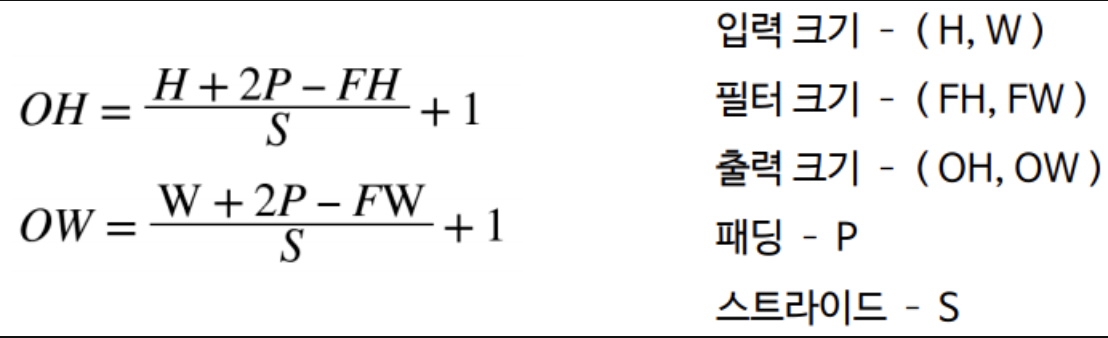

### Change Data size (데이터 크기 변화)

When we created the data loader, we set the batch size to 32. Therefore, the data shape entering the convolutional layer is (32, 3, 32, 32), which is four dimensions. *`Shape` : (batch size, number of channels, number of horizontal pixels, number of vertical pixels)

1. initial image: (32, 3, 32, 32)
2. first convolution operation: (32, 32, 34, 34)
3. first max pooling: (32, 32, 17, 17)
4. second convolution operation: (32, 64, 19, 19)
5. second maximum pooling: (32, 64, 9, 9)
6. average pooling: (32, 64, 4, 4)
7. flattening: (32, 1024)
8. fully-connected: (32, 2)

데이터 로더를 생성할 때 배치 크기를 32로 설정했습니다. 따라서 합성곱 계층에 입력되는 데이터 형상은 4차원인 (32, 3, 32, 32)입니다. *`형상` : (배치 크기, 채널 수, 가로 픽셀 수, 세로 픽셀 수)

1. 초기 이미지 : (32, 3, 32, 32)
2. 첫 번째 합성곱 연산 : (32, 32, 34, 34)
3. 첫 번째 최대 풀링 : (32, 32, 17, 17)
4. 두 번째 합성곱 연산 : (32, 64, 19, 19)
5. 두 번째 최대 풀링 : (32, 64, 9, 9)
6. 평균 풀링 : (32, 64, 4, 4)
7. 평탄화 : (32, 1024)
8. 전결합 : (32, 2)

Finally, we'll create a CNN model with the Model class we defined and assign it to the device equipment. We've saved the model we assigned to the GPU in the model variable, and if we print model, we can see the full structure of the model.

마지막으로, 이렇게 정의한 Model 클래스로 CNN 모델을 생성하여 device 장비에 할당하겠습니다. GPU에 할당한 모델을 model 변수에 저장했으며 model을 출력하면 모델의 전체 구조를 볼 수 있습니다.

In [ ]:
model = Model().to(device)
model

## 4. Train Model (모델 훈련)

Now that your model is ready, you'll want to train it, but before you do, you need to define your loss function and optimizer.

모델이 준비됐으니 훈련을 시켜보고 싶을 것입니다. 하지만 훈련에 앞서 손실 함수와 옵티마이저를 정의해야 합니다.

### Set Loss Function (손실 함수 설정)

Let's start by defining the loss function. Training a neural network model involves updating the weights, which is done in such a way that the loss between the predicted and actual values becomes smaller. The function to find the loss is the loss function. We'll use cross-entropy as our loss function.

손실 함수부터 정의해봅시다. 신경망 모델 훈련은 가중치를 갱신하는 작업인데, 가중치 갱신은 예측값과 실젯값의 손실이 작아지는 방향으로 이루어집니다. 이때 손실값을 구하는 함수가 손실 함수입니다. 여기서는 손실 함수로 교차 엔트로피를 사용하겠습니다.

In [ ]:
# 손실 함수
criterion = nn.CrossEntropyLoss()

### Set Optimizer (옵티마이저 설정)

An optimizer is an algorithm that finds the optimal weights. Since this is a baseline model, we'll set it to the default optimizer, SGD, which is a Stochastic Gradient Descent optimizer.

옵티마이저는 최적 가중치를 찾아주는 알고리즘입니다. 베이스라인 모델이니까 기본 옵티마이저인 SGD로 설정하겠습니다. SGD는 확률적 경사 하강법(Stochastic Gradient Descent)을 이용한 옵티마이저죠.

In [ ]:
# 옵티마이저
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) ## lr : learing rate (학습률)

### Train Model (모델 훈련)

Let's start training the model. The procedure for training a deep learning model for images is as follows.

1. Fetch data in batch size from the data loader.
2. Assign the imported image data and label (target value) data to a machine (GPU or CPU).
3. Initialize the slopes in the optimizer.
4. Pass the input data (images) to the neural network model and forward propagate to get the output (predicted value).
5. Calculate the loss by comparing the predicted value to the actual label (target value).
6. Perform backpropagation based on the loss.
7. Update the weights using the slope obtained from backpropagation.
8. Repeat steps 1-7 for the number of iterations.
9. Repeat steps 1-8 by the number of epochs.

본격적으로 모델을 훈련해보죠. 이미지용 딥러닝 모델 훈련 절차는 다음과 같습니다.

1. 데이터 로더에서 배치 크기만큼 데이터를 불러옵니다.
2. 불러온 이미지 데이터와 레이블(타깃값) 데이터를 장비(GPU 혹은 CPU)에 할당합니다.
3. 옵티마이저 내 기울기를 초기화합니다.
4. 신경망 모델에 입력 데이터(이미지)를 전달해 순전파하여 출력값(예측값)을 구합니다.
5. 예측값과 실제 레이블(타깃값)을 비교해 손실을 계산합니다.
6. 손실을 기반으로 역전파를 수행합니다.
7. 역전파로 구한 기울기를 활용해 가중치를 갱신합니다.
8. 1~7 절차를 반복 횟수(iteration)만큼 되풀이합니다.
9. 1~8 절차를 에폭(epoch)만큼 반복합니다.

Now let's train the model, with an epoch of 10, and have it output a loss value at the end of each epoch.

이제 모델을 훈련시키겠습니다. 에폭은 10으로 지정하고, 하나의 에폭이 끝날 때마다 손실값을 출력하도록 했습니다.

In [ ]:
epochs = 10 # 총 에폭
# (1) 총 에폭만큼 반복
for epoch in range(epochs):
    epoch_loss = 0 # 에폭별 손실값 초기화
    
    # (2) '반복 횟수'만큼 반복
    for images, labels in loader_train:
        # (3) 이미지, 레이블 데이터 미니배치를 장비에 할당
        images = images.to(device)
        labels = labels.to(device)
        
        # (4) 옵티마이저 내 기울기 초기화
        optimizer.zero_grad()
        # (5) 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # (6) 손실 함수를 활용해 outputs와 labels의 손실값 계산
        loss = criterion(outputs, labels)
        # 현재 배치에서의 손실 추가
        epoch_loss += loss.item() # (7) 역전파 수행
        loss.backward()
        # (8) 가중치 갱신
        optimizer.step()
        
    # (9) 훈련 데이터 손실값 출력
    print(f'에폭 [{epoch + 1}/{epochs}] - 손실값 : {epoch_loss/len(loader_train):.4f}')

We can see that the loss value gradually decreases over the epochs, indicating that the training is working well.

(1) The outer 'for statement' is repeated for the number of epochs(10 times) and (9) outputs the loss value at the end of each epoch.

(2) The inner 'for statement' repeats the number of iterations (= length of the data loader = 493), and each time it extracts a batch size(32) of images and labels from the data loader (loader_train) and assigns them to the images and labels variables.

Then, in (3), we assign the images and labels data to the machine to utilize the GPU for training.

(4) is the code to initialize the gradients stored in the optimizer.

(5) Next, we perform forward propagation by feeding the image data into the model, and then (6) compare the output to the actual labels to find the loss, where model and criterion are the CNN model and the cross-entropy error loss function defined earlier.

(7) Next, we perform backpropagation. In other words, we assign a gradient to the weights (parameters) of the neural network based on the loss.

(8) Finally, we update the weights. The formula to get the new weights is `new weights = old weights - (learning rate x gradient)`.

(4) If there is no optimizer.zero_grad(), the existing gradient will continue to accumulate. Perform an operation to initialize the existing gradient.

에폭을 거듭하면서 손실값이 점차 줄어드는 걸 보아 훈련이 제대로 이루어지고 있다는 것을 알 수 있습니다.

(1) 바깥 for문은 에폭 수(10)만큼 반복하며 (9) 에폭이 끝날 때마다 손실값을 출력합니다.

(2) 안쪽 for문은 반복 횟수(= 데이터 로더의 길이 = 493번)만큼 반복되며, 매번 데이터 로더(loader_train)로부터 배치 크기(32)만큼의 이미지와 레이블을 추출해 images와 labels 변수에 할당해놓습니다.

그러면 (3)에서 이미지와 레이블 데이터를 장비에 할당하여 훈련 시 GPU를 활용하도록 해둡니다.

(4)는 옵티마이저에 저장된 기울기를 초기화하는 코드입니다.

(5) 그 다음으로 모델에 이미지 데이터를 입력하여 순전파를 진행한 다음, (6) 그 결과(output)와 실제 레이블(labels)을 비교해 손실을 구합니다. model과 criterion은 앞에서 정의한 CNN 모델과 교차 엔트로피 오차 손실 함수입니다.

(7) 이어서 역전파를 수행합니다. 바꿔 말해, 손실값을 바탕으로 신경망의 가중치(파라미터)에 기울기를 할당합니다.

(8) 마지막으로 가중치를 갱신합니다. 새로운 가중치를 구하는 공식은 `새로운 가중치 = 기존 가중치 - (학습률 x 기울기)` 입니다.

(4) optimizer.zero_grad()가 없다면, 기존 기울기가 계속 누적됩니다. 기존 기울기를 초기화하는 작업을 수행합니다.

## 5. Validate Performance (성능 검증)

Now that we've finished training, let's get the ROC AUC value using the validation data. First, import the ROC AUC calculation function provided by scikit-learn and initialize a list to hold the true values and prediction probabilities.

훈련이 끝났으니 검증 데이터를 이용해 평가지표인 ROC AUC 값을 구해보겠습니다. 먼저, 사이킷런에서 제공하는 ROC AUC 계산 함수를 임포트하고 실젯값과 예측 확률을 담을 리스트를 초기화합니다.

In [ ]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수 임포트
# 실젯값과 예측 확률값을 담을 리스트 초기화
true_list = []
preds_list = []

To get the ROC AUC, we need the actual values and predicted probabilities, which we plan to put in true_list and preds_list, respectively.

ROC AUC를 구하기 위해 실젯값과 예측 확률이 필요한데, 이를 각각 true_list와 preds_list에 담을 계획입니다.

In [ ]:
model.eval() # (1) 모델을 평가 상태로 설정

with torch.no_grad(): # (2) 기울기 계산 비활성화
    for images, labels in loader_valid: # (3)
        # 이미지, 레이블 데이터 미니배치를 장비에 할당
        images = images.to(device)
        labels = labels.to(device)
        
        # (4) 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        preds = torch.softmax(outputs.cpu(), dim = 1)[:, 1] # (5) 예측 확률
        true = labels.cpu() # (6) 실젯값
        # 예측 확률과 실젯값을 리스트에 추가
        preds_list.extend(preds)
        true_list.extend(true)
        
# (7) 검증 데이터 ROC AUC 점수 계산
print(f'검증 데이터 ROC AUC : {roc_auc_score(true_list, preds_list):.4f}')

The minimum value for ROC AUC is 0 and the maximum is 1. Our model results in a score of 0.9900, which is pretty high for a baseline. That's because it's an easy conversation.

(1) Set the model to evaluate, (2) Don't calculate the slope when validating performance.

(3) Pull validation data from the data loader (loader_valid) in batches and iterate, (4) forward propagate, and (5) get the target predictions. In this case, the batch size is 32 and the target value is 2, so the forward propagation output, outputs, is a tensor with shape (32, 2).

ROC AUC의 최솟값은 0, 최댓값은 1입니다. 우리 모델의 결과는 0.9900이군요. 베이스라인인데도 점수가 꽤 높습니다. 쉬운 대화라서 그렇습니다.

(1) 모델을 평가 상태로 설정하고, (2) 성능 검증 시 기울기를 계산하지 않도록 합니다.

(3) 데이터 로더(loader_valid)에서 검증 데이터를 배치 단위로 뽑아 반복하면서, (4) 순전파하여 (5) 타깃 예측값을 구합니다. 이때 배치 크기는 32, 타깃값은 2개이므로 순전파 출력값인 outputs는 형상이 (32, 2)인 텐서입니다.

Let's look a little closer at the code (5) to get the prediction probabilities.

`preds = torch.softmax(outputs.cpu(), dim = 1)[:, 1]`

To get the ROC AUC, we first need to find the probability of each target value, so we passed the forward propagation output, outputs, to torch.softmax() to get the probability of a target value of 0 and the probability of a target value of 1. The value we want is the probability that the target value is 1, which is the probability that the image contains a cactus. So with the last code `[:, 1]`, we fetched the values in column 1 (rather than column 0) of the results.

예측 확률을 구하는 코드(5)를 조금 더 자세히 봅시다.

`preds = torch.softmax(outputs.cpu(), dim = 1)[:, 1]`

ROC AUC를 구하려면 각 타깃값의 확률을 먼저 구해야 합니다. 그래서 순전파 출력값인 outputs를 torch.softmax()에 넘겨 타깃값이 0일 확률과 1일 확률을 얻었습니다. 우리가 원하는 값은 타깃값이 1일 확률, 즉 이미지가 선인장을 포함할 확률입니다. 그래서 마지막 코드 `[:, 1]`로 호출 결과 중 (0열이 아닌) 1열의 값을 불러왔습니다.

The `outputs.cpu()` in (5) and `labels.cpu()` in (6) reallocate the data from outputs and labels, respectively, that we previously allocated to the GPU, back to the CPU, so that we can calculate the ROC AUC value with the roc_auc_score() function. Note that roc_auc_score() is a scikit-learn function, not a Python function, so it cannot directly use the data that is on the GPU.

(5)의 `outputs.cpu()`와 (6)의 `labels.cpu()`는 각각 이전에 GPU에 할당했던 outputs와 labels의 데이터를 다시 CPU에 할당합니다. 그래야 roc_auc_score() 함수로 ROC AUC 값을 계산할 수 있습니다. roc_auc_score()는 파이토치가 아니라 사이킷런 함수이므로 GPU에 있는 데이터를 직접 사용하지 못합니다.

## 6. Predict & Submission (예측 및 제출)

Finally, it's time to predict and submit. First, we'll create a dataset with our test data and a data loader, which will also have a batch size of 32.

드디어 예측 후 제출하는 단계입니다. 먼저 테스트 데이터를 담은 데이터셋과 데이터 로더를 만들겠습니다. 이 데이터 로더의 배치 크기도 32로 하겠습니다.

In [ ]:
dataset_test = ImageDataset(df = submission, img_dir = 'test/', transform = transform)
loader_test = DataLoader(dataset = dataset_test, batch_size = 32, shuffle = False)

### Predict (예측)

Let's predict the probability that the target value is 1 on the test data (the probability of a photo with a cactus). This is similar to the code for evaluating model performance on validation data. However, we didn't assign the labels variable to the for statement because the test data doesn't have a target value.

테스트 데이터에서 타깃값이 1일 확률(선인장이 있는 사진일 확률)을 예측해보겠습니다. 검증 데이터로 모델 성능을 평가하는 코드와 비슷합니다. 다만 테스트 데이터에는 타깃값이 없어서 for문에 labels 변수는 할당하지 않았습니다.

In [ ]:
model.eval() # 모델을 평가 상태로 설정

preds = [] # (1) 타깃 예측값 저장용 리스트 초기화

with torch.no_grad(): # 기울기 계산 비활성화
    for images, _ in loader_test:
        # 이미지 데이터 미니배치를 장비에 할당
        images = images.to(device)
        
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # (2) 타깃값이 1일 확률(예측값)
        preds_part = torch.softmax(outputs.cpu(), dim = 1)[:, 1].tolist()
        # (3) preds에 preds_part 이어붙이기
        preds.extend(preds_part)

preds in (1) is the list that will hold the target predictions. This is where we'll store our final submission, which is the probability that the target value is 1 (the probability that the cactus contains it).

In (2), we find the probability that the target value is 1 for that batch size and extend it into preds in (3). This way, at the end of the for statement, we have all the final predicted probabilities stored in the preds variable.

(1)의 preds는 타깃 예측값을 담을 리스트입니다. 여기에 최종 제출할 값, 즉 타깃값이 1일 확률(선인장이 포함할 확률)을 저장할 것입니다.

(2)에서는 해당 배치 크기만큼 타깃값이 1일 확률을 구한 후 (3)에서 preds에 이어붙입니다. 이렇게 해서 for문이 끝나면 preds 변수에 최종 예측 확률이 모두 저장되어 있습니다.

### Submission (제출)

We'll create a submission file with the final predicted probabilities we just got.

방금 구한 최종 예측 확률로 제출 파일을 만들겠습니다.

In [ ]:
submission['has_cactus'] = preds
submission.to_csv('submission.csv', index = False)

Before submitting, let's delete both the training and test image data. You created the train and test directories under the /kaggle/working directory earlier to store the uncompressed image data. We don't need them anymore, so let's delete them.

제출 전에 훈련 이미지 데이터와 테스트 이미지 데이터를 모두 삭제하겠습니다. 초기에 /kaggle/working 디렉터리 하위에 train, test 디렉터리를 만들어 압축이 풀린 이미지 데이터들을 저장했었죠? 더는 필요가 없으니 삭제합니다.

In [ ]:
import shutil

shutil.rmtree('./train')
shutil.rmtree('./test')

The End.